In [1]:
import numpy as np


def pcaEVD(X):
    # Center X and get covariance matrix C
    n, p = X.shape
    X -= X.mean(axis=0)
    C = (X.T@X) / (n-1)

    # EVD
    e_vals, e_vecs = np.linalg.eig(C)
    idx = e_vals.argsort()[::-1]   
    e_vals = e_vals[idx]
    e_vecs = e_vecs[:, idx]

    # Return principal compnents and eigenvalues to calculate the portion of sample variance explained
    return (X @ e_vecs), e_vals

def pcaSVD(X):
    # Center X and get covariance matrix C
    n, p = X.shape
    X -= X.mean(axis=0)

    # SVD
    u, sigma, vt = np.linalg.svd(X, full_matrices=False)

    # Return principal compnents and eigenvalues to calculate the portion of sample variance explained
    return (X @ vt.T), (sigma**2) / (n-1)

In [2]:
from sklearn.datasets import load_iris
# Q: how to drop the last column in df?
# A: 

iris = load_iris()
X = iris['data']
y = iris['target']

X_ = X - X.mean(axis=0)
u, sigma, vt = np.linalg.svd(X_, full_matrices=False)

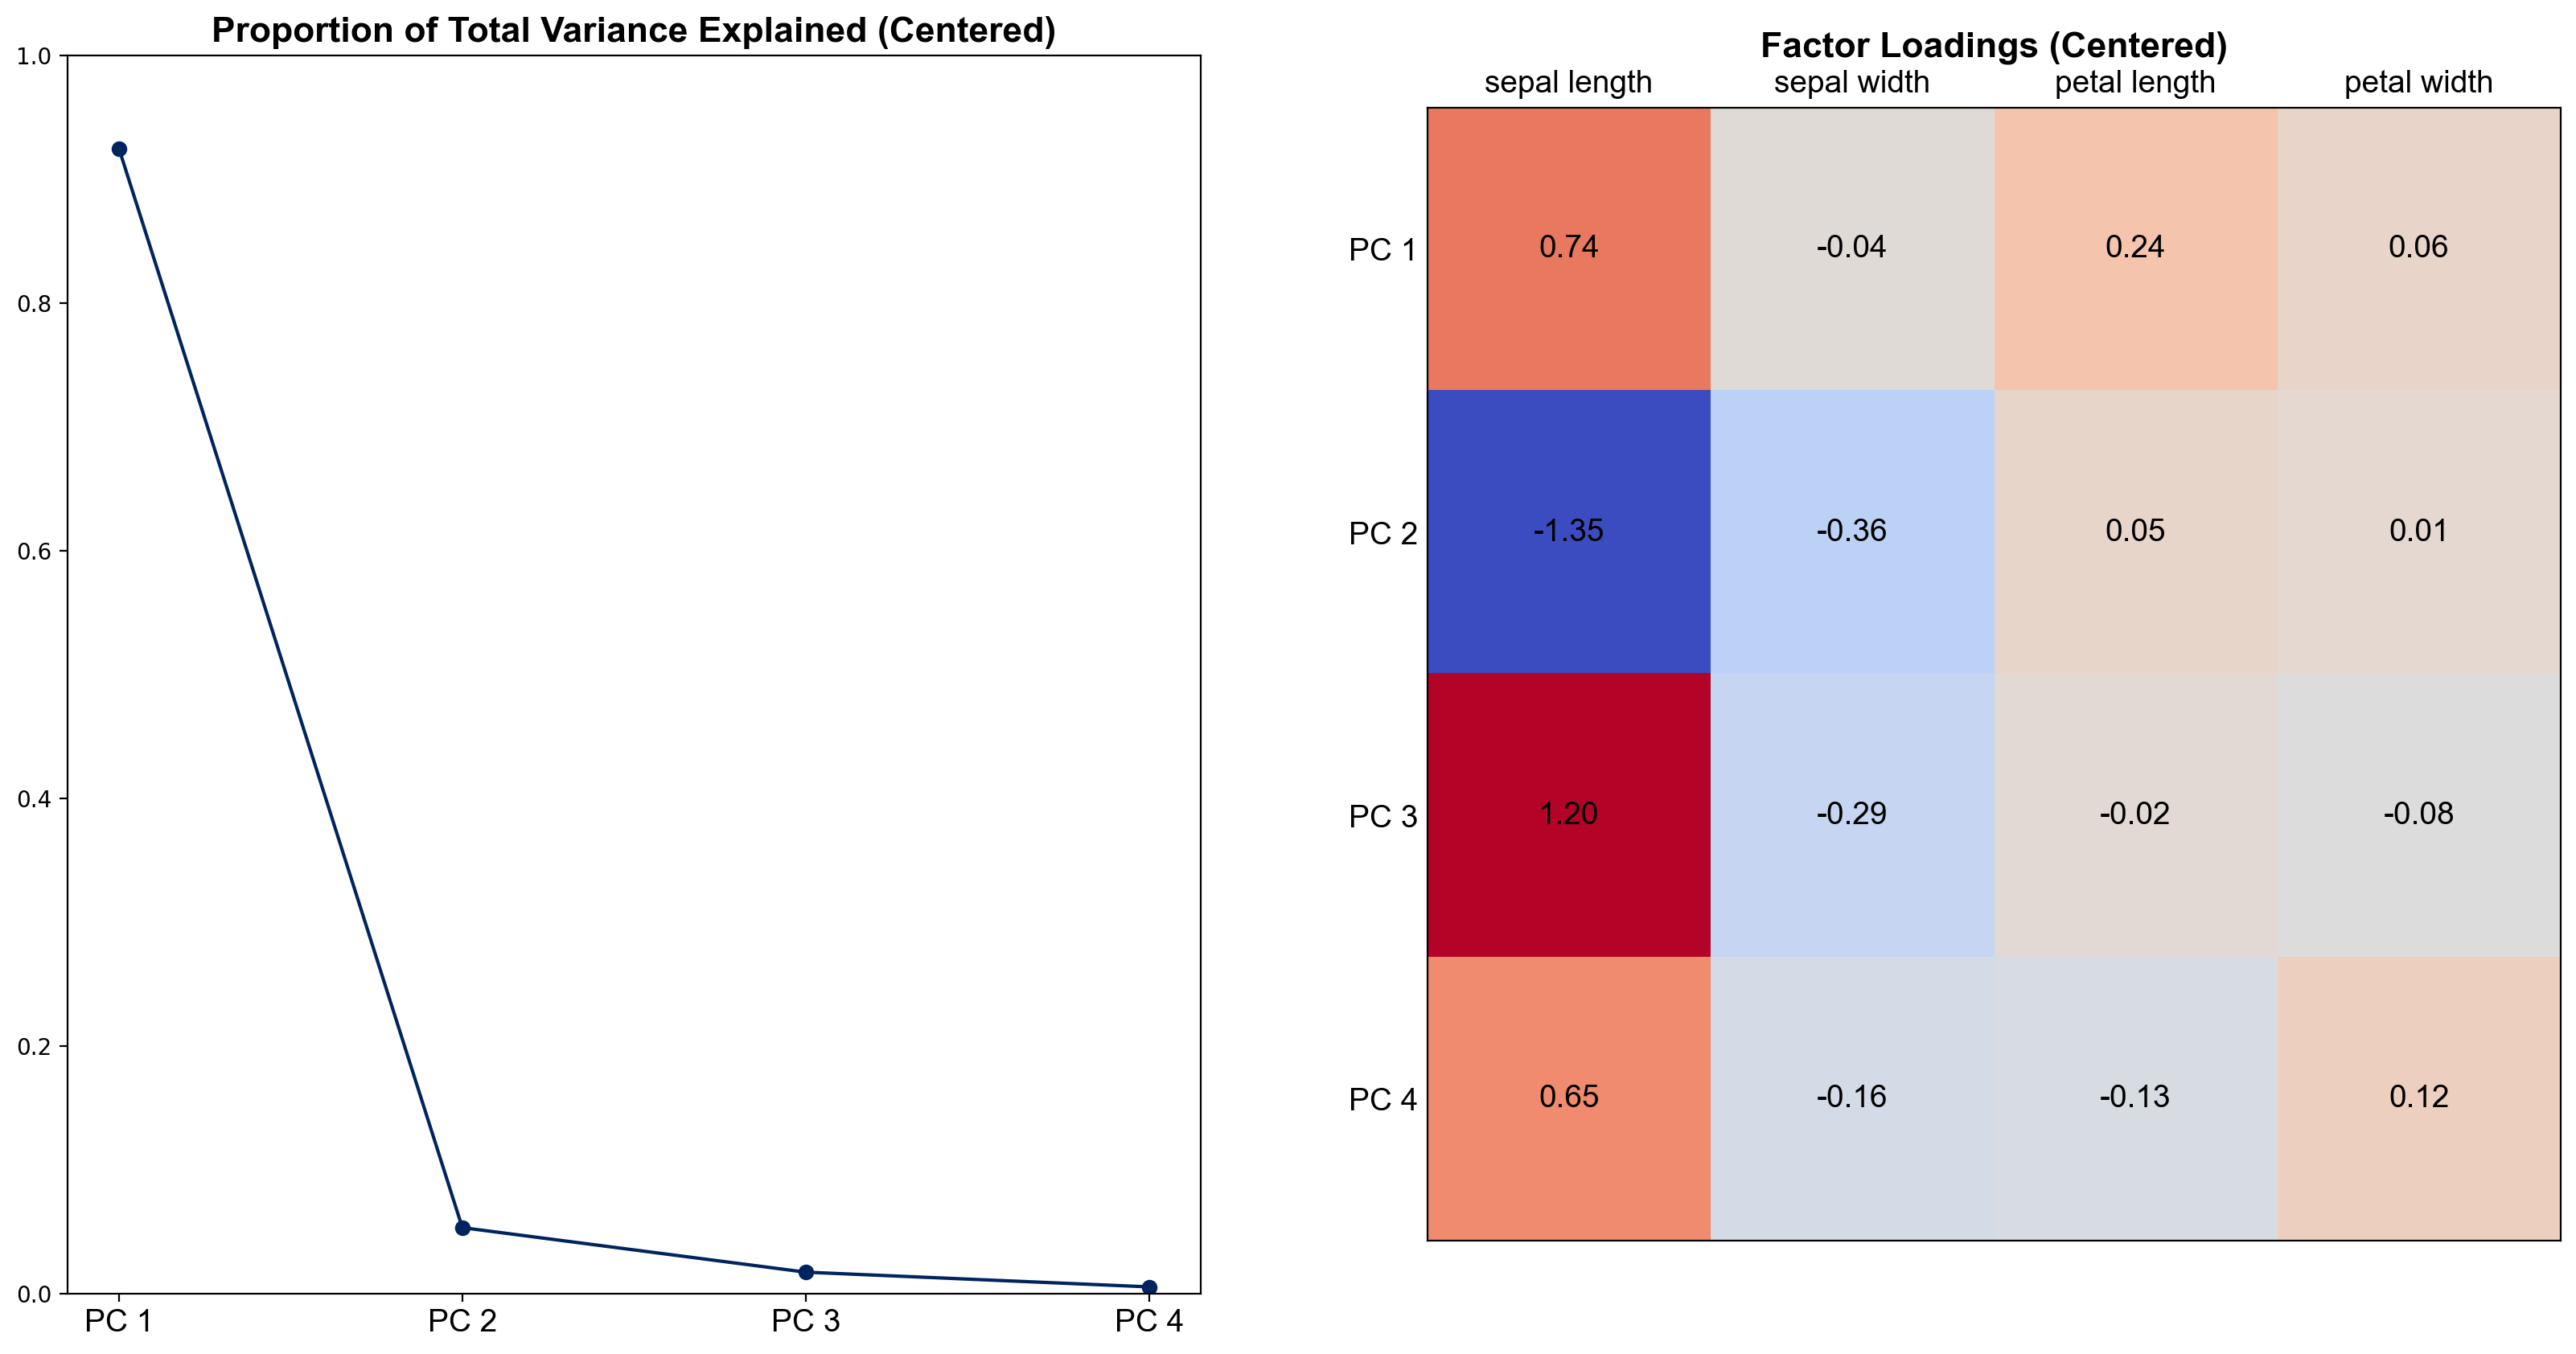

In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


TITLE_FONT = FontProperties(family="Arial", size=16, weight="semibold")
AXIS_FONT = FontProperties(family="Arial", size=14)
LASALLE_BLUE = "#00245D"

# Get feature names
feature_names = [" ".join(name.split(" ")[:-1])
                 for name in iris['feature_names']]
p = vt.shape[0]
pc_labels = ["PC %s" % (i+1) for i in range(p)]

# Calculate proportion of variance explained
eig_val = sigma**2 / (X_.shape[0]-1)
ve = eig_val / eig_val.sum()

plt.figure(figsize=(20, 10), dpi=200)

# Plot proportion of total variance explained.......................
plt.subplot(1, 2, 1)
plt.plot(range(p), ve, 'o-', c=LASALLE_BLUE)
plt.title("Proportion of Total Variance Explained (Centered)", fontproperties=TITLE_FONT)
plt.xticks(range(p), pc_labels, fontproperties=AXIS_FONT)
plt.ylim(0, 1)

# Plot factor loadings
plt.subplot(1, 2, 2)
plt.matshow(vt*np.sqrt(eig_val), cmap="coolwarm", fignum=False)
plt.title("Factor Loadings (Centered)", fontproperties=TITLE_FONT)
plt.yticks(range(p), pc_labels, fontproperties=AXIS_FONT)
plt.xticks(range(p), feature_names, fontproperties=AXIS_FONT)
plt.tick_params(axis='both', length=0.5, direction='out')
for (i, j), z in np.ndenumerate(vt*np.sqrt(eig_val)):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
             fontproperties=AXIS_FONT)